# Logistic regression with Algerian Forest Fires DataSet

In [62]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scikitplot as skl

In [63]:
# pip install scikit-plot

In [64]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1) # Reading the Data
data.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [65]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.025820
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.426747
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [66]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [67]:
data.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [68]:
# replacing zero values with the mean of the column
data['day'] = data['day'].replace(0,data['day'].mean())
data['month'] = data['month'].replace(0,data['month'].mean())
data['year'] = data['year'].replace(0,data['year'].mean())
data['Temperature'] = data['Temperature'].replace(0,data['Temperature'].mean())

In [69]:
data['RH'] = data['RH'].replace(0,data['RH'].mean())
data['Ws'] = data['Ws'].replace(0,data['Ws'].mean())

In [70]:
data['FFMC'] = data['FFMC'].replace(0,data['FFMC'].mean())
data['DMC'] = data['DMC'].replace(0,data['DMC'].mean())
data['ISI'] = data['ISI'].replace(0,data['ISI'].mean())
data['BUI'] = data['BUI'].replace(0,data['BUI'].mean())

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

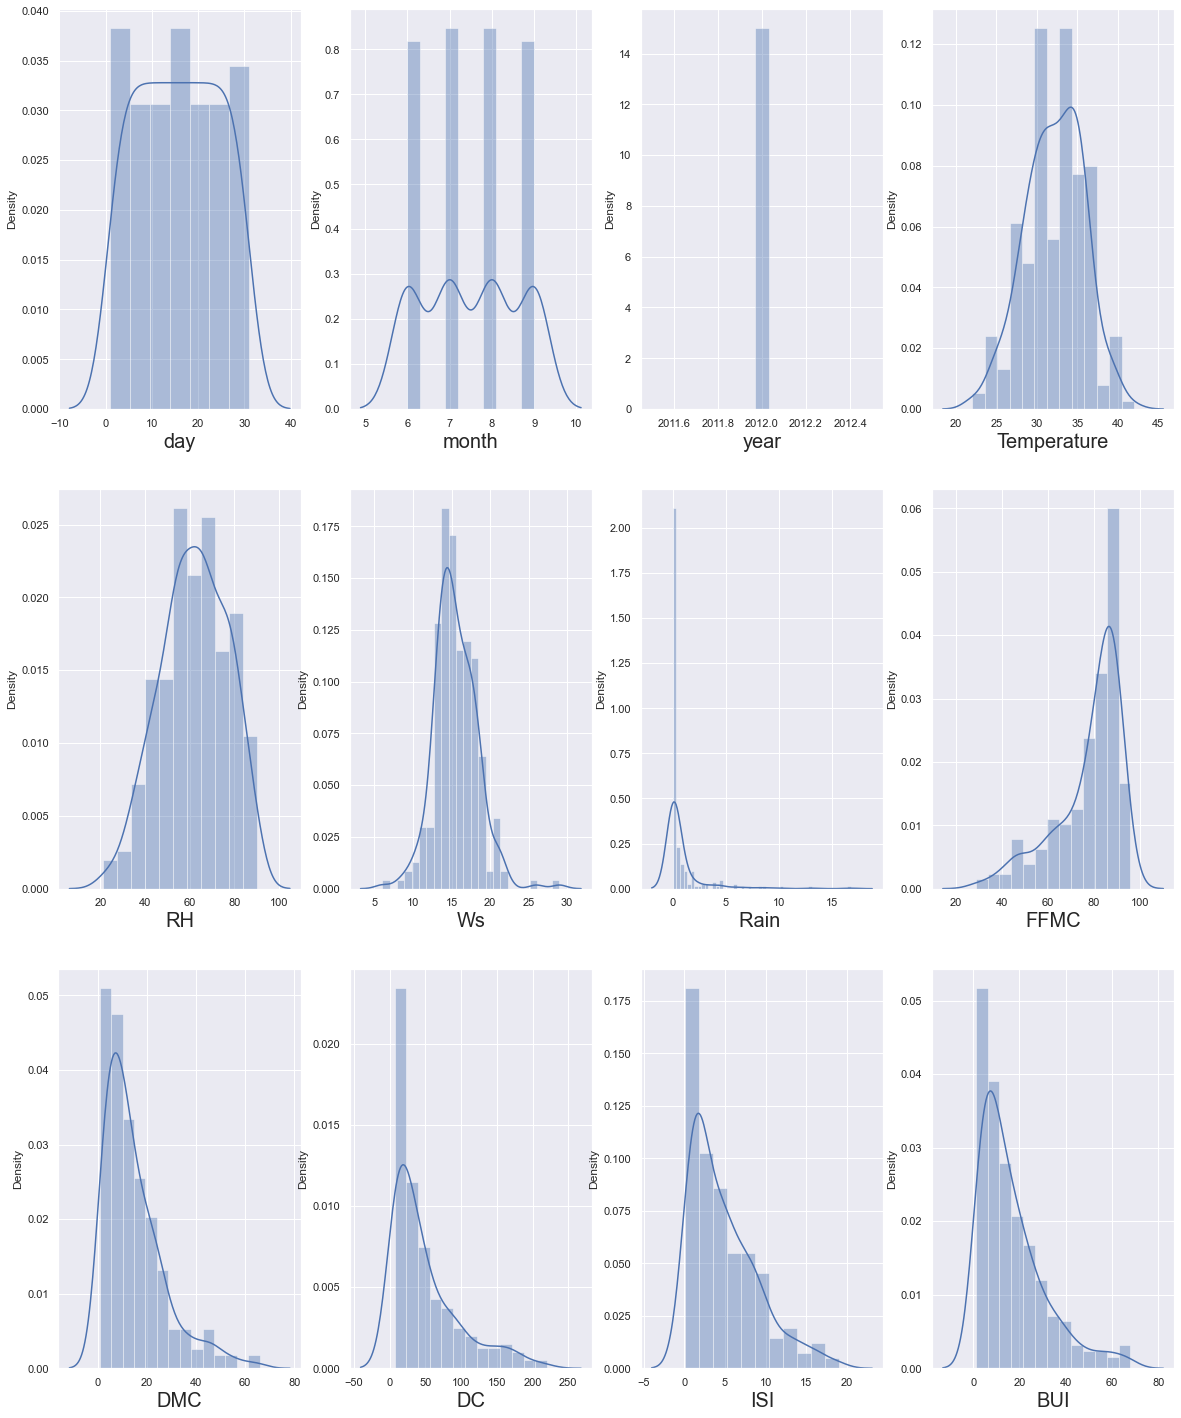

In [71]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12 :
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()       
    

<AxesSubplot:>

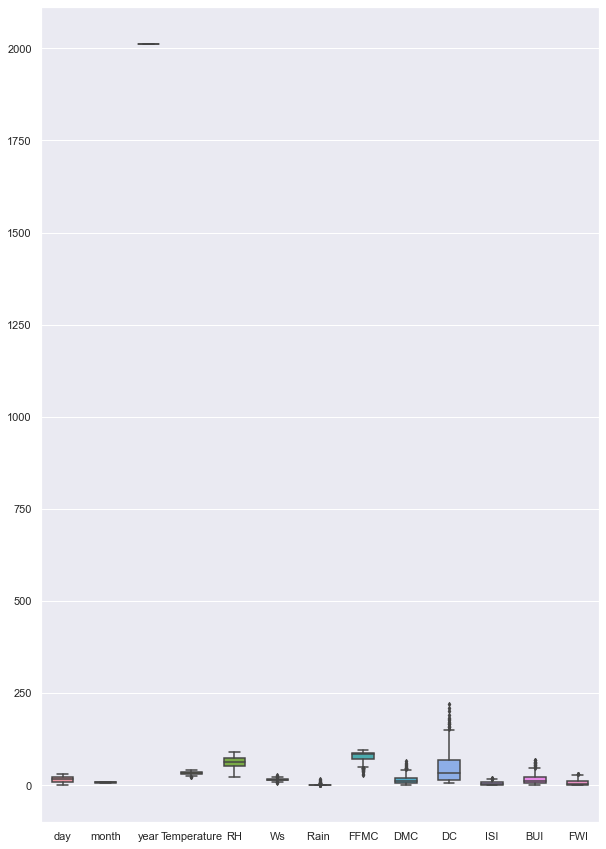

In [72]:
fig, ax = plt.subplots(figsize=(10,15))
sns.boxplot(data=data, width=0.5,ax=ax,  fliersize=3)

In [73]:
q = data['day'].quantile(0.99)
# we are removing the top 1% data from the day column
data_cleaned = data[data['day']<q]

q = data_cleaned['month'].quantile(0.99)
# we are removing the top 1% data from the month column
data_cleaned  = data_cleaned[data_cleaned['month']<q]

q = data_cleaned['year'].quantile(0.99)
# we are removing the top 1% data from the year column
data_cleaned  = data_cleaned[data_cleaned['year']<q]

q = data_cleaned['Temperature'].quantile(0.95)
# we are removing the top 5% data from the Temperature column
data_cleaned  = data_cleaned[data_cleaned['Temperature']<q]

q = data_cleaned['RH'].quantile(0.99)
# we are removing the top 1% data from the RH column
data_cleaned  = data_cleaned[data_cleaned['RH']<q]

q = data_cleaned['Ws'].quantile(0.99)
# we are removing the top 1% data from the Ws column
data_cleaned  = data_cleaned[data_cleaned['Ws']<q]

q = data_cleaned['FFMC'].quantile(0.99)
# we are removing the top 1% data from the FFMC column
data_cleaned  = data_cleaned[data_cleaned['FFMC']<q]

q = data_cleaned['DMC'].quantile(0.99)
# we are removing the top 1% data from the DMC column
data_cleaned  = data_cleaned[data_cleaned['DMC']<q]

q = data_cleaned['ISI'].quantile(0.99)
# we are removing the top 1% data from the ISI column
data_cleaned  = data_cleaned[data_cleaned['ISI']<q]

q = data_cleaned['BUI'].quantile(0.99)
# we are removing the top 1% data from the BUI column
data_cleaned  = data_cleaned[data_cleaned['BUI']<q]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

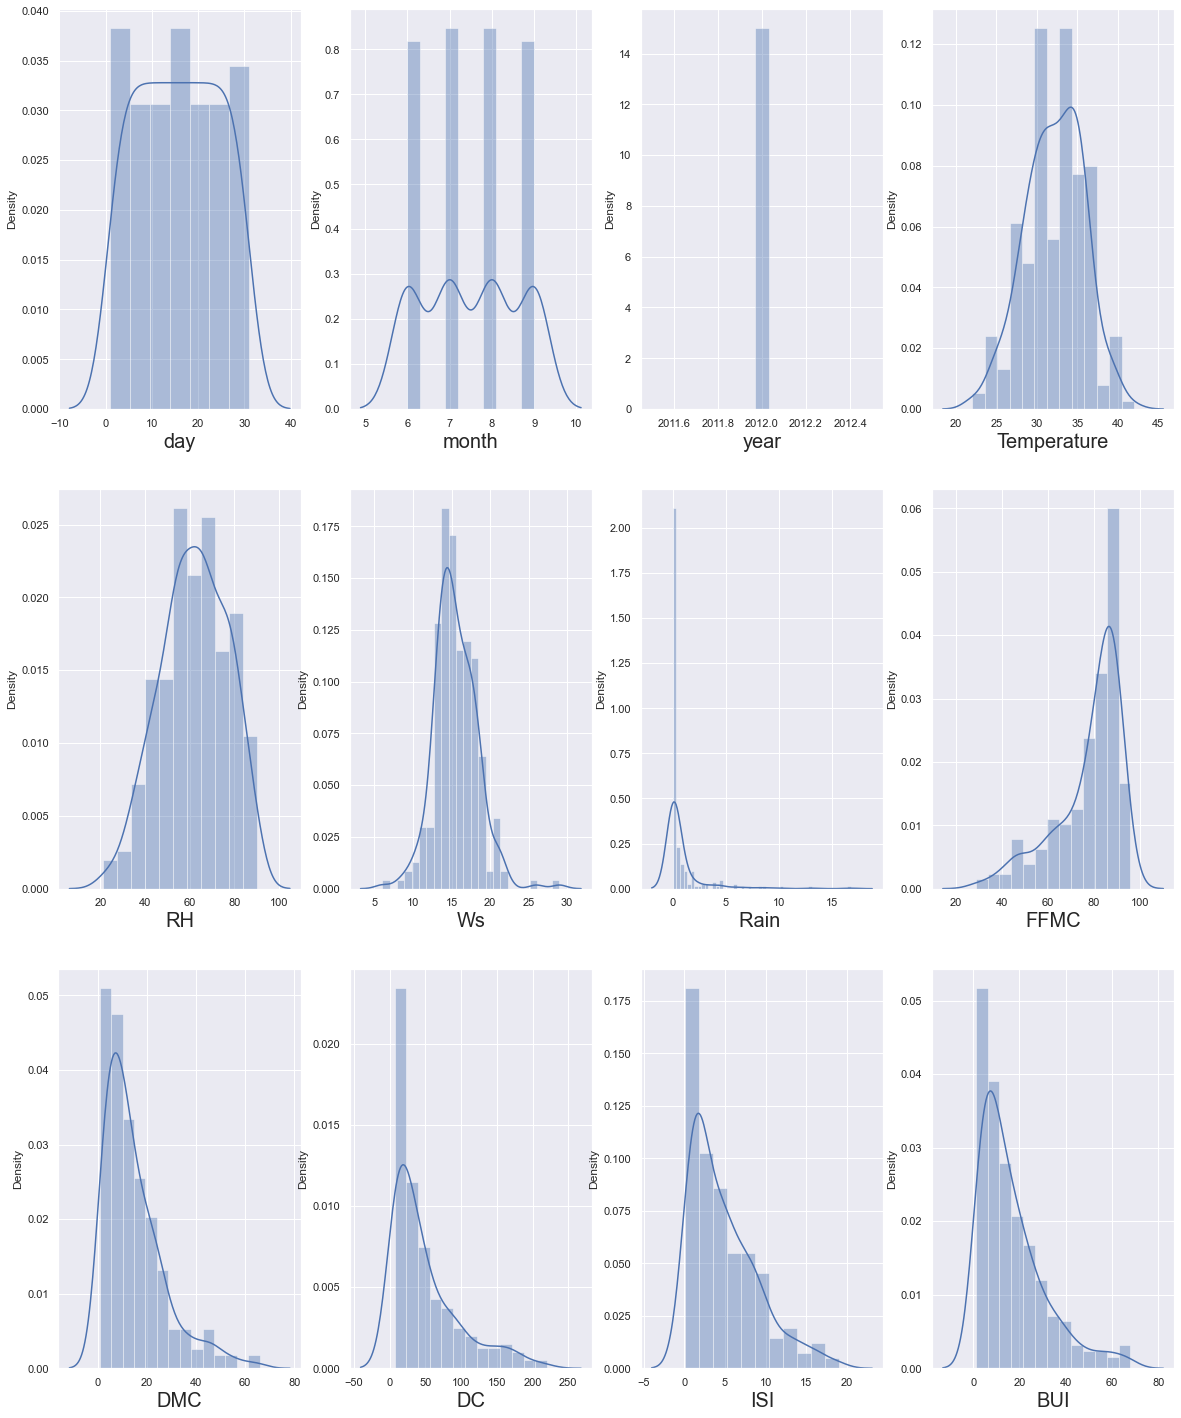

In [74]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12 :
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()     

In [75]:
X = data.drop(columns = ['FWI','Classes'])
Y = data['Classes']

In [76]:
X.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI'],
      dtype='object')

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anacond

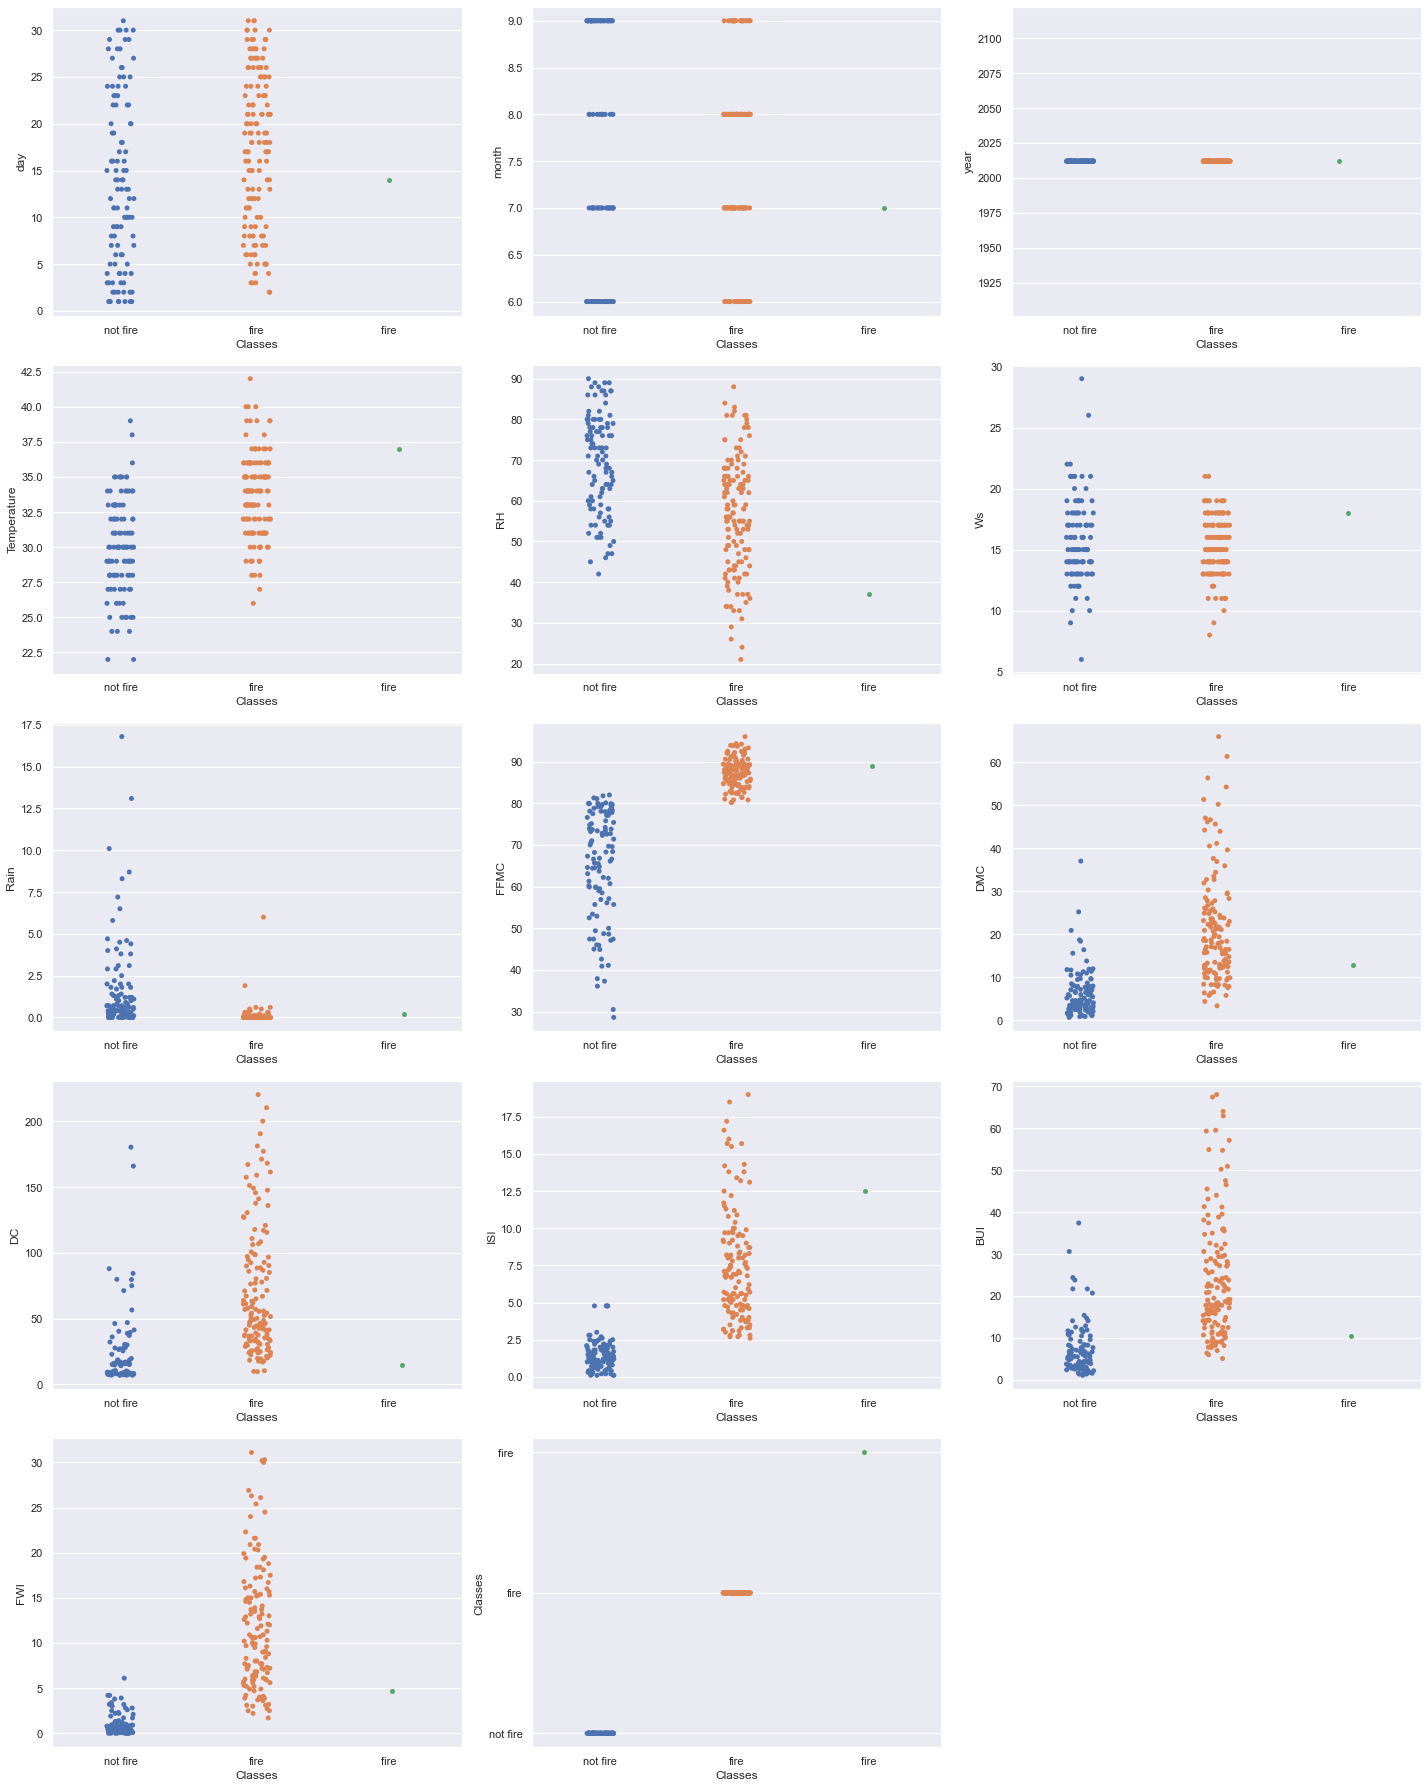

In [77]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=14 :
        ax = plt.subplot(5,3,plotnumber)
        sns.stripplot(Y,data[column])
    plotnumber+=1
plt.tight_layout()

In [78]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [79]:
X_scaled

array([[-1.67527776, -1.35052592,  0.        , ..., -0.87723857,
        -0.8620497 , -0.93573985],
       [-1.56173115, -1.35052592,  0.        , ..., -0.87723857,
        -0.93484882, -0.90046818],
       [-1.44818455, -1.35052592,  0.        , ..., -0.88776002,
        -1.10471343, -0.98512017],
       ...,
       [ 1.39048054,  1.35052592,  0.        , ..., -0.87092571,
        -1.08044706, -0.93573985],
       [ 1.50402714,  1.35052592,  0.        , ..., -0.71731258,
        -0.76498421, -0.8158162 ],
       [ 1.61757374,  1.35052592,  0.        , ..., -0.68995682,
        -0.88631608, -0.83697919]])

In [80]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,1.483095,day
1,1.083211,month
2,NaN,year
3,2.424593,Temperature
4,2.730415,RH
5,1.262220,Ws
6,1.552635,Rain
7,3.525801,FFMC
8,76.075400,DMC
9,25.042458,DC


let's split our data in test and training set.

In [81]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y, test_size= 0.25, random_state = 355)

In [82]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [83]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

Let's see how well our model performs on the test data set.

In [84]:
y_pred = log_reg.predict(x_test)

In [85]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9672131147540983

In [86]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[32,  2],
       [ 0, 27]], dtype=int64)

In [87]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [88]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9672131147540983

In [89]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9411764705882353

In [90]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [91]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9696969696969697